# UNISOLAR Solar Power Generation Dataset
## Dataset of photovoltaic solar energy generation in multi-university environment

- Goal is to benchmark and enhance operational outcomes in the investigated solar sites.
- Link: https://www.kaggle.com/datasets/cdaclab/unisolar/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 180F-2F4C

 Directory of C:\Users\user\Documents\Data_Science\Project#9\EDA_Solar_Engineering

2024-07-02  11:57 PM    <DIR>          .
2024-07-02  11:57 PM    <DIR>          ..
2024-07-02  11:43 PM    <DIR>          .ipynb_checkpoints
2024-03-23  02:26 AM           258,930 La_Trobe_University.png
2022-11-09  04:44 AM            63,126 Monthly_Summary_Solar.csv
2024-03-22  09:53 PM           431,260 Picture1.png
2024-07-02  11:57 PM           599,952 Project#8_EDA_Solar_Engineering.ipynb
2024-03-22  09:10 PM             1,415 README.txt
2022-11-09  04:44 AM        83,812,309 Solar_Energy_Generation.csv
2022-11-09  04:44 AM             3,042 Solar_Site_Details.csv
2024-03-23  03:12 AM           599,725 Untitled.ipynb
2022-11-09  04:44 AM        22,535,132 Weather_Data_reordered_all.csv
               9 File(s)    108,304,891 bytes
               3 Dir(s)  24,475,090,944 bytes free


## Understanding the Data

In [3]:
df_summary = pd.read_csv('Monthly_Summary_Solar.csv')
df_summary.head()

,SiteKey,Year,Month,DataStatus,AverageSolarGeneration,MaxSolarGeneration,MinSolarGeneration
0,1,2020,January,True,10.157125,21.778,0.101
1,2,2020,January,True,8.536875,18.553,0.100
2,3,2020,January,True,6.309834,13.322,0.103
3,4,2020,January,False,NaN,NaN,NaN
4,5,2020,January,False,NaN,NaN,NaN


In [4]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SiteKey                 1176 non-null   int64  
 1   Year                    1176 non-null   int64  
 2   Month                   1176 non-null   object 
 3   DataStatus              1176 non-null   bool   
 4   AverageSolarGeneration  976 non-null    float64
 5   MaxSolarGeneration      976 non-null    float64
 6   MinSolarGeneration      976 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df_summary['SiteKey'].nunique()

42

- SiteKey: Data originates from 42 photovoltaic (PV) sites installed across five campuses.
- Year and Month: Indicates the timeframe during which data was collected, spanning a total of 2 years.
- Average, Min, Max energy production for the entire month of a specific year: These metrics represent the average, minimum, and maximum energy production recorded for each month of a particular year. The appropriate units for energy production are unspecified (e.g., kWh).
- Were the sites out of service for certain months? If so, was it due to weather conditions or faulty equipment?: It is unclear whether the PV sites experienced periods of inactivity. If they were indeed out of service, the reason for the downtime—whether attributed to adverse weather conditions or faulty equipment—would need to be investigated.
- NULL values?: The presence of NULL values in the dataset should be examined. These values could indicate missing data points, which might impact the analysis and interpretation of the dataset.

In [6]:
# Create Table Version where DataStatus = True Only
df_summary_true = df_summary[df_summary['DataStatus'] == True]
df_summary_true.head()

,SiteKey,Year,Month,DataStatus,AverageSolarGeneration,MaxSolarGeneration,MinSolarGeneration
0,1,2020,January,True,10.157125,21.7780,0.101
1,2,2020,January,True,8.536875,18.5530,0.100
2,3,2020,January,True,6.309834,13.3220,0.103
6,7,2020,January,True,7.103033,16.0312,0.125
8,9,2020,January,True,1.109013,2.0080,0.101


In [7]:
df_summary_true.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1175
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SiteKey                 976 non-null    int64  
 1   Year                    976 non-null    int64  
 2   Month                   976 non-null    object 
 3   DataStatus              976 non-null    bool   
 4   AverageSolarGeneration  976 non-null    float64
 5   MaxSolarGeneration      976 non-null    float64
 6   MinSolarGeneration      976 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 54.3+ KB


- No more NULL values

In [8]:
# Moving on to the next table
df_Site = pd.read_csv('Solar_Site_Details.csv')
df_Site

,CampusKey,SiteKey,kWp,Number of panels,Panel,Inverter,Optimizers,Metric,lat,Lon
0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
3,2,4,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
4,2,5,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
6,3,7,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
7,3,8,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
8,3,9,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
9,3,10,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232


In [9]:
df_Site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CampusKey         42 non-null     int64  
 1   SiteKey           42 non-null     int64  
 2   kWp               25 non-null     float64
 3   Number of panels  25 non-null     float64
 4   Panel             25 non-null     object 
 5   Inverter          25 non-null     object 
 6   Optimizers        23 non-null     object 
 7   Metric            25 non-null     object 
 8   lat               42 non-null     float64
 9   Lon               42 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 3.4+ KB


1) 42 sites across 5 campuses - CONFIRMED. 
2) With the exception of CampusKey = 1, data describing remaining campuses is useless for analysis (crucial data is missing - all NULL values). 
3) Remove NULL values

In [10]:
df_Site_C1 = df_Site[df_Site['CampusKey'] == 1] #Storing data for CampusKey=1 for future use

In [11]:
#Moving on to next table

df_Generation = pd.read_csv('Solar_Energy_Generation.csv')
df_Generation.head()

,CampusKey,SiteKey,Timestamp,SolarGeneration
0,2,1,2020-01-01 00:15:00,NaN
1,2,1,2020-01-01 00:30:00,NaN
2,2,1,2020-01-01 00:45:00,NaN
3,2,1,2020-01-01 01:00:00,NaN
4,2,1,2020-01-01 01:15:00,NaN


In [12]:
df_Generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731946 entries, 0 to 2731945
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CampusKey        int64  
 1   SiteKey          int64  
 2   Timestamp        object 
 3   SolarGeneration  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 83.4+ MB


In [13]:
df_Generation.head()

,CampusKey,SiteKey,Timestamp,SolarGeneration
0,2,1,2020-01-01 00:15:00,NaN
1,2,1,2020-01-01 00:30:00,NaN
2,2,1,2020-01-01 00:45:00,NaN
3,2,1,2020-01-01 01:00:00,NaN
4,2,1,2020-01-01 01:15:00,NaN


- Description indicated that dataset includes approximately two years of PV solar energy generation data collected at 15-minute intervals. 
- Create a version of table where SolarGeneration >= 0 for future reference

In [14]:
df_Generation_positive = df_Generation[df_Generation['SolarGeneration'] >= 0]
df_Generation_positive.head()

,CampusKey,SiteKey,Timestamp,SolarGeneration
24,2,1,2020-01-01 06:15:00,0.135
25,2,1,2020-01-01 06:30:00,0.465
26,2,1,2020-01-01 06:45:00,1.039
27,2,1,2020-01-01 07:00:00,1.673
28,2,1,2020-01-01 07:15:00,2.560


In [15]:
#Final Table
df_Weather = pd.read_csv('Weather_Data_reordered_all.csv')
df_Weather.head()

,CampusKey,Timestamp,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,1,2020-01-01 00:00:00,13.666667,13.880000,8.960000,72.400000,0.000000,188.133333
1,1,2020-01-01 00:15:00,13.206667,13.666667,9.040000,73.466667,1.200000,203.866667
2,1,2020-01-01 00:30:00,12.840000,13.553333,9.053333,74.000000,2.520000,222.800000
3,1,2020-01-01 00:45:00,12.113333,13.506667,9.100000,74.466667,5.986667,231.133333
4,1,2020-01-01 01:00:00,11.946667,13.260000,9.266667,76.533333,5.946667,247.866667


In [16]:
df_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371769 entries, 0 to 371768
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampusKey            371769 non-null  int64  
 1   Timestamp            371769 non-null  object 
 2   ApparentTemperature  264656 non-null  float64
 3   AirTemperature       264656 non-null  float64
 4   DewPointTemperature  264656 non-null  float64
 5   RelativeHumidity     264656 non-null  float64
 6   WindSpeed            208879 non-null  float64
 7   WindDirection        208879 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 22.7+ MB


- Weather data is sourced from the Australian Bureau of Meteorology (BOM).
- In summary, data is collected at 15-minute intervals from 42 photovoltaic (PV) sites spread across 5 distinct campuses.
- The collected data includes the amount of solar energy produced ('SolarGeneration') as well as corresponding weather conditions such as apparent temperature, air temperature, dew point temperature, relative humidity, wind speed, and wind direction.
- Additionally, a table provides a summary of the equipment at each site. However, detailed data is only available for one of the five campus sites.

## Exploration

- Tables of Interest: df_Weather, df_Generation_positive, df_Site_C1, df_summary_true
- I will be INNER JOINING df_Weather and df_Generation_positive to check relationship between power generation and weather conditions

In [17]:
df_WG = pd.merge(df_Generation_positive,df_Weather, on=['CampusKey', 'Timestamp'], how='inner')
df_WG.head()

,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,2,1,2020-01-01 06:15:00,0.135,13.973333,15.246667,9.146667,67.000000,5.746667,172.866667
1,2,2,2020-01-01 06:15:00,0.100,13.973333,15.246667,9.146667,67.000000,5.746667,172.866667
2,2,1,2020-01-01 06:30:00,0.465,13.800000,15.213333,9.166667,67.266667,6.426667,174.733333
3,2,2,2020-01-01 06:30:00,0.345,13.800000,15.213333,9.166667,67.266667,6.426667,174.733333
4,2,3,2020-01-01 06:30:00,0.239,13.800000,15.213333,9.166667,67.266667,6.426667,174.733333


<Axes: >

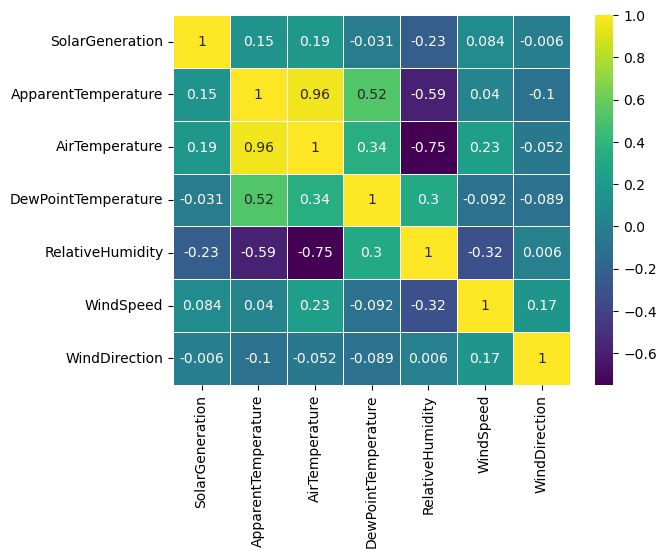

In [18]:
# Correlation Analysis

df_corr = df_WG[['SolarGeneration', 'ApparentTemperature', 'AirTemperature', 'DewPointTemperature', 'RelativeHumidity', 'WindSpeed', 'WindDirection']]
corr_study = df_corr.corr()
sns.heatmap(corr_study, annot=True, cmap='viridis', linewidths=0.5)

- Solar generation exhibits a negative correlation coefficient of -0.23 with relative humidity. Higher humidity levels tend to reduce the efficiency of solar cells by creating a thin layer of water on their surface. Research suggests that this effect can decrease efficiency by 10-20% of the total power output.
- Apparent temperature and air temperature show a positive correlation coefficient with solar generation. Increased sunlight exposure leads to higher power generation by solar panels. This typically occurs during the day when the sun is out, allowing solar panels to operate at their maximum capacity.
- Windspeed has a coefficient of 0.084, indicating a positive correlation with solar generation. Wind helps cool solar panels, which can enhance their efficiency. Although the impact on overall solar panel production may be modest, even a slight decrease in temperature can improve efficiency. Over time, these incremental improvements can accumulate.
- Wind direction and dewpoint temperature have minimal to negligible effects on solar generation. Their influence on solar panel efficiency appears to be insignificant compared to other factors such as relative humidity, temperature, and windspeed.

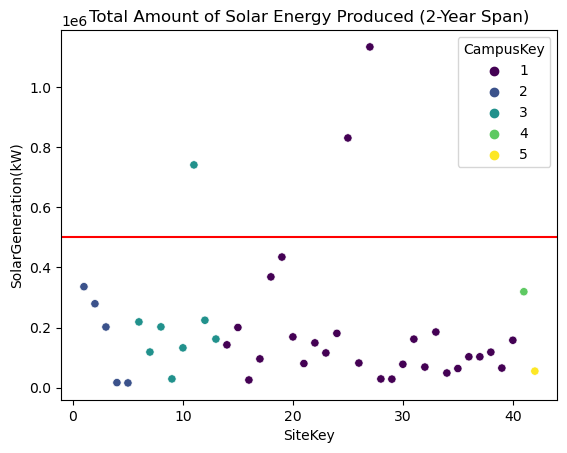

In [19]:
# GroupBy to check total amount of solar energy produced per campus and site - span of 2 years

df_grouped = df_WG[['CampusKey','SiteKey','SolarGeneration']].groupby(['CampusKey', 'SiteKey']).sum()


plt.title('Total Amount of Solar Energy Produced (2-Year Span)')
plt.ylabel('SolarGeneration(kW)')
sns.scatterplot(data=df_grouped, x='SiteKey', y='SolarGeneration', hue='CampusKey', palette='viridis')
plt.axhline(y = 0.5e06, color='r')

In [20]:
summary = df_grouped.describe()
mean = 1.968279e+05
std = 2.249905e+05

In [21]:
# Statistical rule of thumb to confirm outliers
df_grouped[np.abs(df_grouped['SolarGeneration'] - mean) > 2*std]

SolarGeneration
CampusKey SiteKey                 
1         25          8.301094e+05
          27          1.132735e+06
3         11          7.405724e+05

- 2/3 outliers were found in CampusKey=1 which we have solar site details. Goal is to attempt to understand reasoning behind discrepancy. 

In [22]:
check = [25,27]
df_Site_C1[df_Site_C1['SiteKey'].isin(check)]

,CampusKey,SiteKey,kWp,Number of panels,Panel,Inverter,Optimizers,Metric,lat,Lon
24,1,25,384.12,1164.00,Trina 330W,4 x SolarEdge SE82.8K,584 x P730,kWh,-37.718287,145.050975
26,1,27,539.80,1240.92,SunpowerSPR-E20-435-COM,5 X ABB,NaN,kWh,-37.718287,145.050975


- Distinct panel designs. Perhaps, the location is the key factor here: lat -37.718287 and lon 145.050975. 
- These sites are located at La Trobe University (attached image for reference):

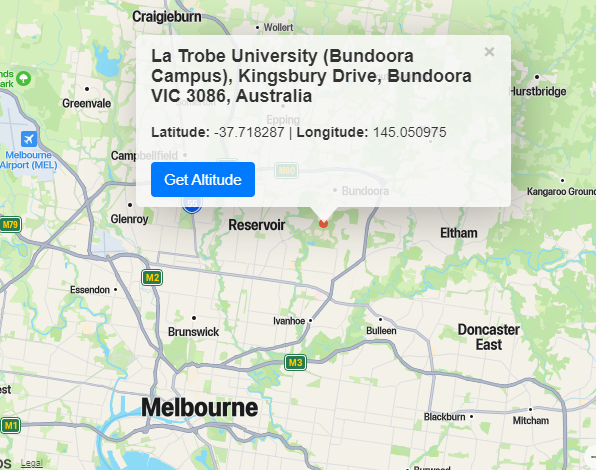

### Going back to the Summary Table

In [23]:
df_summary_true.head()

,SiteKey,Year,Month,DataStatus,AverageSolarGeneration,MaxSolarGeneration,MinSolarGeneration
0,1,2020,January,True,10.157125,21.7780,0.101
1,2,2020,January,True,8.536875,18.5530,0.100
2,3,2020,January,True,6.309834,13.3220,0.103
6,7,2020,January,True,7.103033,16.0312,0.125
8,9,2020,January,True,1.109013,2.0080,0.101


In [24]:
#Statistical Summary for ALL sites
df_summary_true.describe()

,SiteKey,Year,AverageSolarGeneration,MaxSolarGeneration,MinSolarGeneration
count,976.000000,976.000000,976.000000,976.000000,976.000000
mean,21.723361,2020.857582,6.551887,16.933539,0.109027
std,12.290305,0.683283,7.565232,19.664548,0.012178
min,1.000000,2020.000000,0.467732,1.207031,0.100000
25%,11.000000,2020.000000,2.529455,6.542969,0.101562
50%,22.000000,2021.000000,4.387570,12.042969,0.101581
75%,32.250000,2021.000000,7.014564,17.708984,0.113281
max,42.000000,2022.000000,43.907113,99.218800,0.321289


<Axes: xlabel='AverageSolarGeneration', ylabel='Count'>

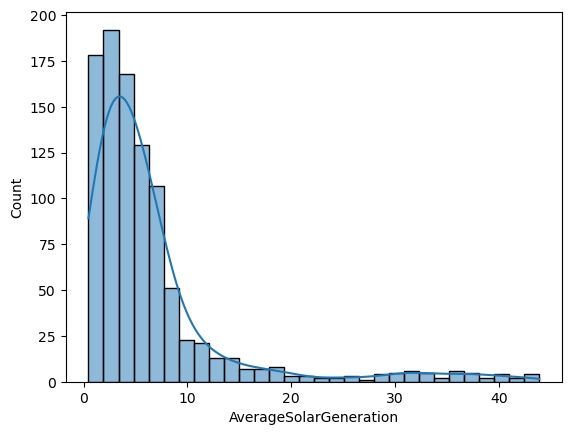

In [25]:
sns.histplot(df_summary_true['AverageSolarGeneration'], bins=30, kde=True)

- Highest concentration of the average production of solar energy across all sites for the investigated span of 2-years resides within 0-10 units. 

### - The following interactive visualization was achieved after thorough research. I had the vision and knew what I wanted, but did not know how to implement it.

In [32]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact

# Assuming df_summary_true is already defined somewhere in your code
# df_summary_true = ...

# Define a function to create the bar plot for a given site key and year
def create_bar_plot(SiteKey, Year):
    # Clear previous output
    clear_output(wait=True)
    
    # Filter data for the selected site key and year
    filtered_data = df_summary_true[(df_summary_true['SiteKey'] == SiteKey) & (df_summary_true['Year'] == Year)]
    
    # Create a bar plot using Plotly Express
    fig = px.bar(filtered_data, x='Month', y=['AverageSolarGeneration', 'MaxSolarGeneration', 'MinSolarGeneration'], 
                 title=f'Solar Generation for Site {SiteKey} in {Year}', barmode='group')
    
    # Update layout to change axis labels
    fig.update_layout(xaxis_title='Month', yaxis_title='Energy (kWh)')
    
    # Show the plot
    fig.show(renderer="notebook")
    
# Use interact to create the dropdown widgets for selecting the site key and year
interact(create_bar_plot, SiteKey=widgets.Dropdown(options=df_summary_true['SiteKey'].unique(), description='SiteKey:'),
         Year=widgets.Dropdown(options=df_summary_true['Year'].unique(), description='Year:'))


interactive(children=(Dropdown(description='SiteKey:', options=(1, 2, 3, 7, 9, 10, 12, 13, 27, 41, 42, 34, 35,…

<function __main__.create_bar_plot(SiteKey, Year)>

- Solar generation experiences a noticeable decline from June to September, occasionally starting as early as April or May. This decline coincides with the winter months in different parts of Australia where the data was recorded.
- Conversely, solar generation peaks from October to March with relatively stable results.
- Data from 2022 is less comprehensive compared to previous years.
- There is a significant spread between the maximum and average solar generation. This variance is likely due to peaks in generation occurring during late mornings and early afternoons. Solar panels operate at maximum capacity for only a limited number of hours during the day, leading to a decrease in energy production towards the end of the day.

### Recommendations

1) Conduct a detailed investigation into the outliers mentioned. A thorough understanding of the factors that contribute to their great performance can assist in enhancing strategies/procedures for other sites.

2) Develop strategies to mitigate the impact of seasonal trends on solar generation. They include optimizing energy storage capacity or implementing supplementary energy sources during periods of low solar generation.

3) Use the correlation analysis performed above as well as site characteristics to optimize solar panel deployment and operation. Consider factors such as panel orientation and  weather conditions to maximize energy generation.

4) Improve the data collection to ensure accuracy for all years, with particular attention to gaps observed in 2022.

### Acknowledgements

S. Wimalaratne, D. Haputhanthri, S. Kahawala, G. Gamage, D. Alahakoon and A. Jennings, "UNISOLAR: An Open Dataset of Photovoltaic Solar Energy Generation in a Large Multi-Campus University Setting," 2022 15th International Conference on Human System Interaction (HSI), 2022, pp. 1-5, doi: 10.1109/HSI55341.2022.9869474.